[*********************100%***********************]  1 of 1 completed


 type of data is <class 'pandas.core.frame.DataFrame'>
 type of data_monthly is <class 'pandas.core.frame.DataFrame'>
Index(['^NSEI'], dtype='object', name='Ticker')
Index(['^NSEI'], dtype='object', name='Ticker')


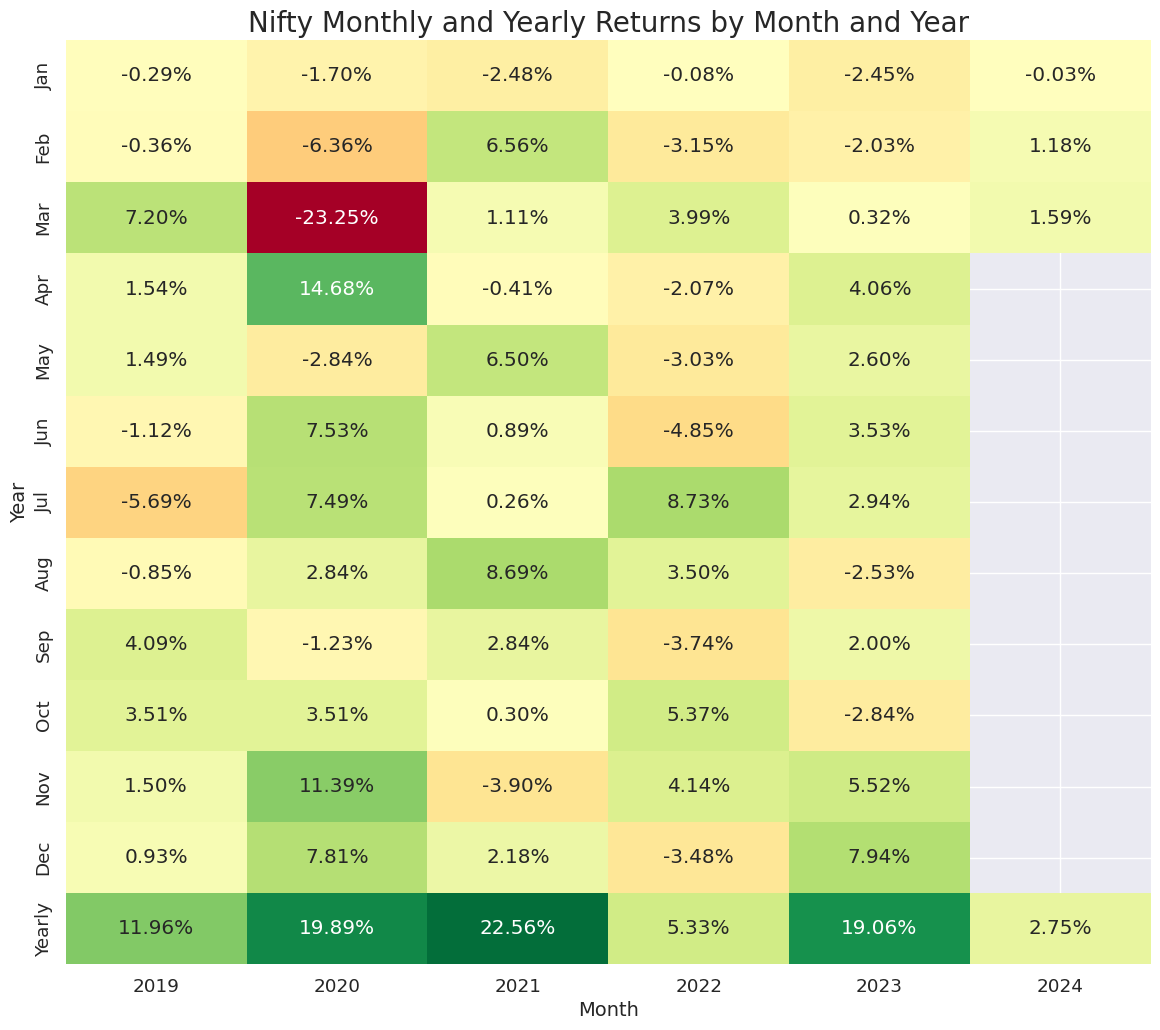

In [34]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ticker = "^NSEI"
start_date = "2018-12-31"
end_date = "2024-03-12"

# Download the historical data for Nifty Index
data = yf.download(ticker, start=start_date, end=end_date)

print(f" type of data is {type(data)}")
# Resample the data on a monthly basis
data_monthly = data.resample('ME').last()

# Calculate the monthly returns
monthly_returns = data_monthly['Close'].pct_change()
print(f" type of data_monthly is {type(monthly_returns)}")
# Convert monthly returns to a pandas DataFrame
monthly_returns_df = pd.DataFrame(monthly_returns)
print(monthly_returns.columns)
print(monthly_returns_df.columns)
monthly_returns.head(10)
monthly_returns_matrix = monthly_returns_df.pivot_table(
    values='^NSEI',
    index=monthly_returns_df.index.month,
    columns=monthly_returns_df.index.year
)
# Set the index names to the month names
monthly_returns_matrix.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Calculate the sum of monthly returns for each year
yearly_returns = monthly_returns_df.groupby(monthly_returns_df.index.year)['^NSEI'].sum()

# Add the yearly returns to the matrix as a new row
monthly_returns_matrix.loc['Yearly'] = yearly_returns

# Set the font scale
sns.set(font_scale=1.2)

# Plot the heatmap using seaborn
plt.figure(figsize=(14, 12))
sns.heatmap(monthly_returns_matrix, annot=True, cmap='RdYlGn', center=0, fmt='.2%', cbar=False)
plt.title('Nifty Monthly and Yearly Returns by Month and Year', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.show()

In [13]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ticker = "^NSEI"
start_date = "2018-12-31"
end_date = "2024-03-12"

# Download the historical data for Nifty Index
data = yf.download(ticker, start=start_date, end=end_date)

print(f" type of data is {type(data)}")
# Resample the data on a monthly basis
data_monthly = data.resample('ME').last()

# Calculate the monthly returns
monthly_returns = data_monthly['Close'].pct_change()
print(f" type of data_monthly is {type(monthly_returns)}")
# Convert monthly returns to a pandas DataFrame
monthly_returns_df = pd.DataFrame(monthly_returns)

# Pivot the DataFrame to create a matrix of monthly returns by month and year
monthly_returns_matrix = monthly_returns_df.pivot_table(values='Close', index=monthly_returns_df.index.month, columns=monthly_returns_df.index.year)

# Set the index names to the month names
monthly_returns_matrix.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Calculate the sum of monthly returns for each year
yearly_returns = monthly_returns_df.groupby(monthly_returns_df.index.year)['Adj Close'].sum()

# Add the yearly returns to the matrix as a new row
monthly_returns_matrix.loc['Yearly'] = yearly_returns

# Set the font scale
sns.set(font_scale=1.2)

# Plot the heatmap using seaborn
plt.figure(figsize=(14, 12))
sns.heatmap(monthly_returns_matrix, annot=True, cmap='RdYlGn', center=0, fmt='.2%', cbar=False)
plt.title('Nifty Monthly and Yearly Returns by Month and Year', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.show()

[*********************100%***********************]  1 of 1 completed

 type of data is <class 'pandas.core.frame.DataFrame'>
 type of data_monthly is <class 'pandas.core.frame.DataFrame'>


KeyError: 'Close'

# New Section